In [1]:
from image_data_quality.image_dataset import Imagelab
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob

In [2]:
# ! pip install cifar2png
# ! cifar2png cifar10 ./cifar10png --name-with-batch-index

In [3]:
def display_results(files, topk=5):
    for i, f in enumerate(files[:topk]):
        display(Image(os.path.join(f)))

In [4]:
pd.set_option('display.max_rows', 20)

In [5]:
dataset_path = "/Users/sanjana/Downloads/synthetic_caltech/*/"

In [6]:
imagelab = Imagelab(dataset_path)
print(f"Number of images: {str(len(imagelab.image_files))}")

Number of images: 30657


In [7]:
issues = imagelab.evaluate()
imagelab.aggregate()
summary, results_df = imagelab.summary()

Checking for Blurred, Grayscale, Entropy, NearDuplicates, AspectRatio, LightImages, Duplicated, DarkImages


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30657/30657 [09:14<00:00, 55.29it/s]

Color spaces in the  dataset
{'RGB': 30185, 'L': 472}

Issue Summary
                Issues  Percent of Data  Issue Intensity
NearDuplicates    1265             4.13         0.232751
DarkImages        1253             4.09         0.230543
AspectRatio       1073             3.50         0.197424
Blurred            887             2.89         0.163201
Grayscale          512             1.67         0.094204
LightImages        265             0.86         0.048758
Entropy            149             0.49         0.027415
Duplicated          31             0.10         0.005704



# Dark Images

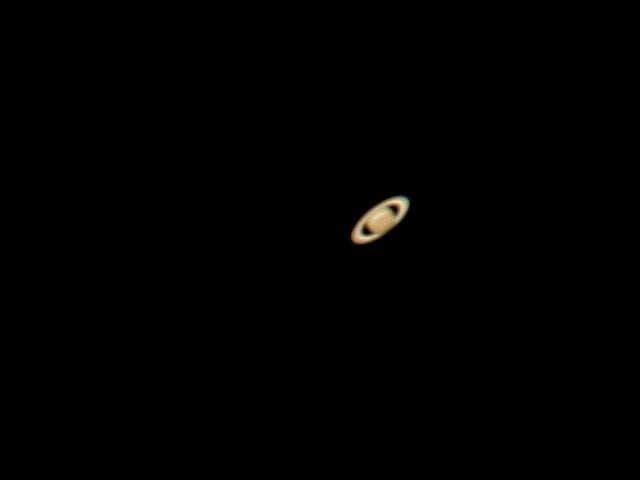

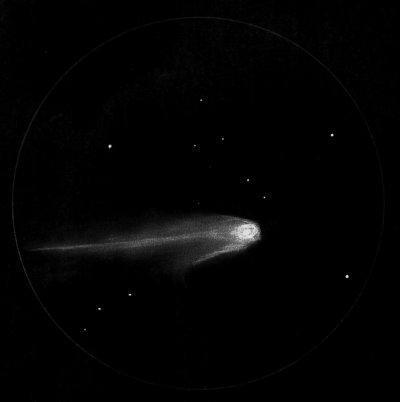

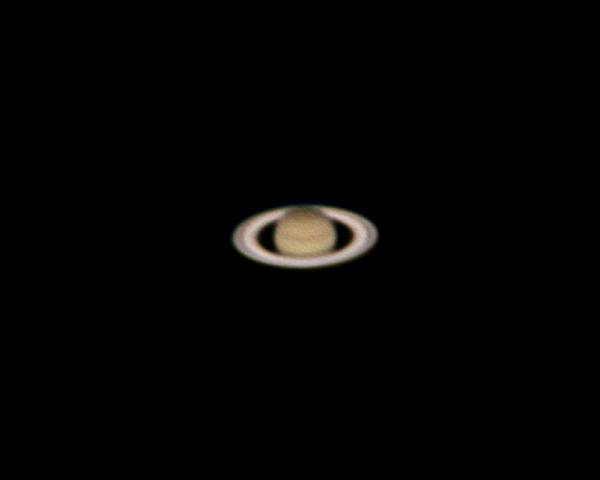

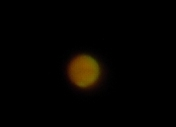

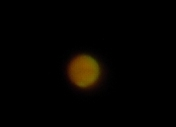

In [8]:
sorted_df = results_df.sort_values(by=[f'DarkImages score'])
files =list(sorted_df[sorted_df[f'DarkImages bool'] == True]['image_name'])
display_results(files)

## Grayscale Images

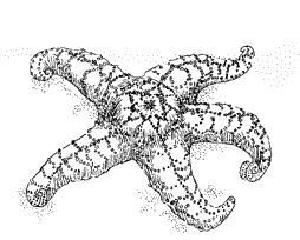

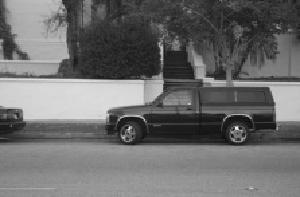

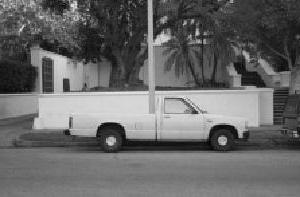

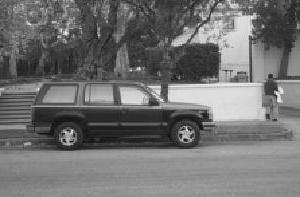

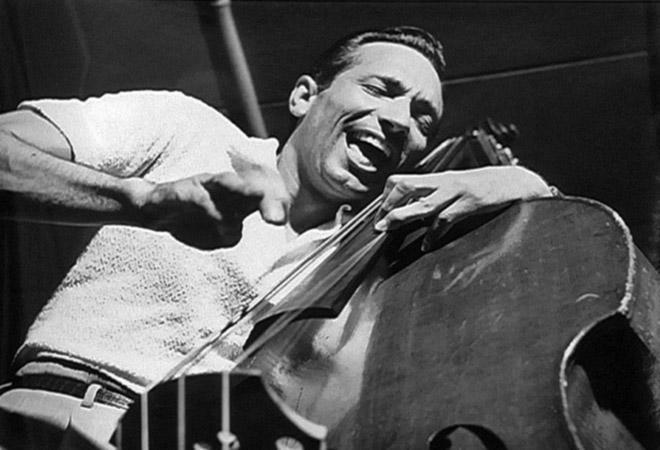

In [9]:
sorted_df = results_df.sort_values(by=[f'Grayscale score'])
files =list(sorted_df[sorted_df[f'Grayscale bool'] == True]['image_name'])
display_results(files)

## Blurred images

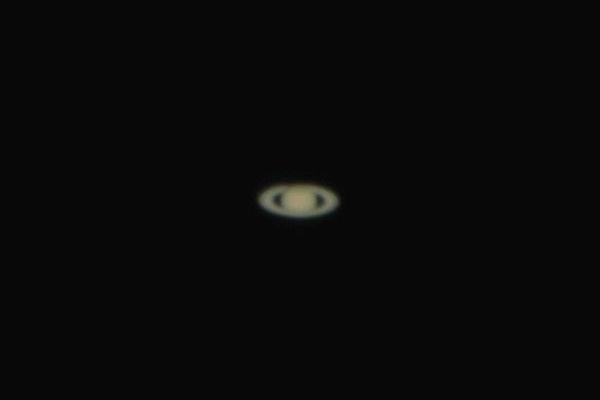

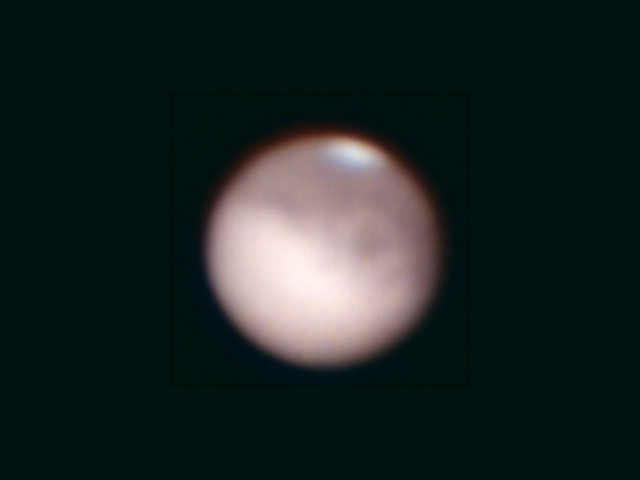

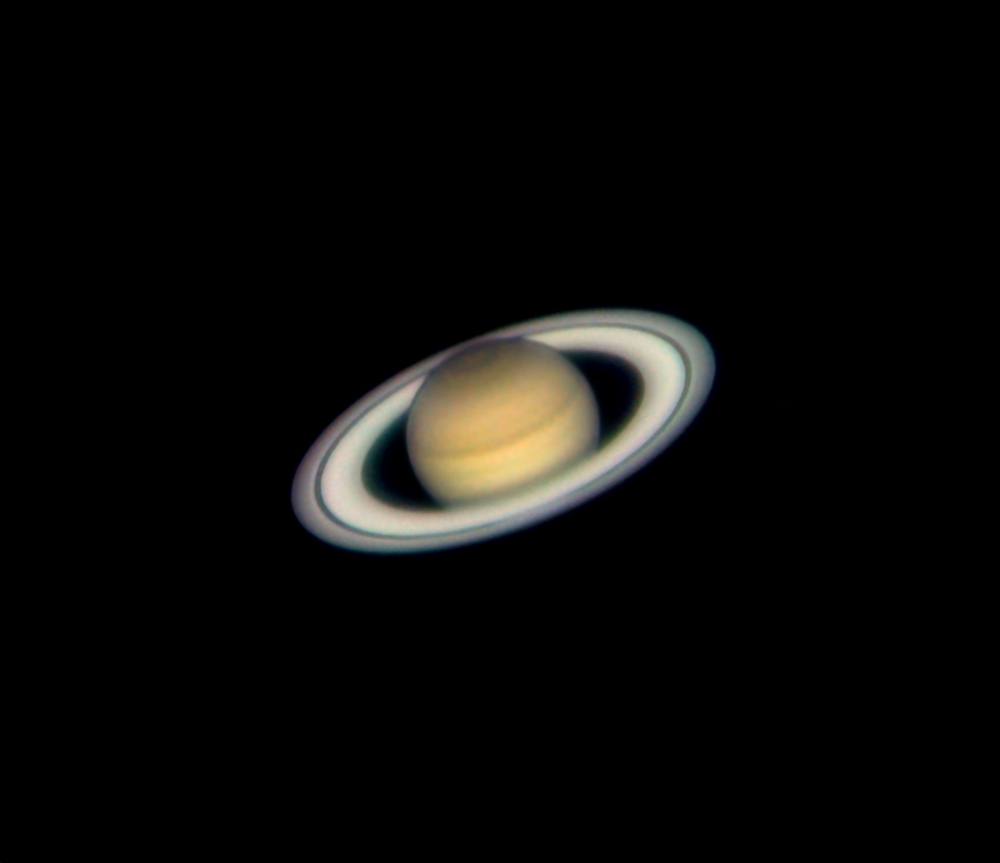

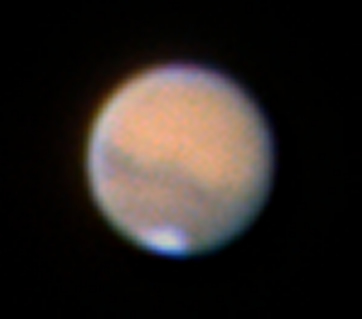

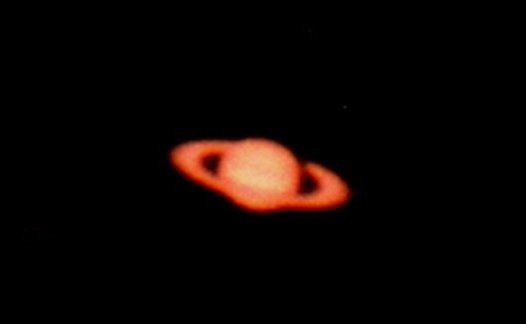

In [10]:
sorted_df = results_df.sort_values(by=[f'Blurred score'])
files =list(sorted_df[sorted_df[f'Blurred bool'] == True]['image_name'])
display_results(files)

## Skewed aspect ratio

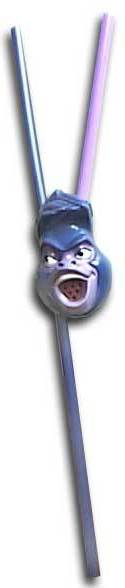

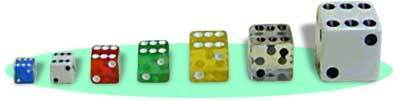

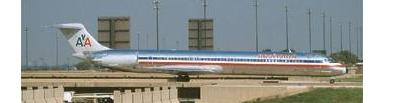

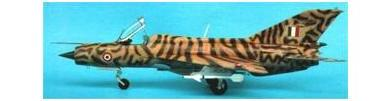

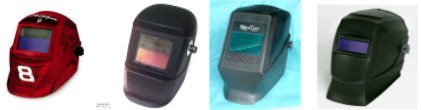

In [11]:
sorted_df = results_df.sort_values(by=[f'AspectRatio score'])
files =list(sorted_df[sorted_df[f'AspectRatio bool'] == True]['image_name'])
display_results(files)

## Light Images

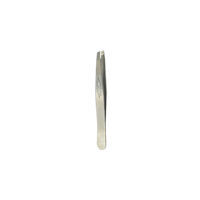

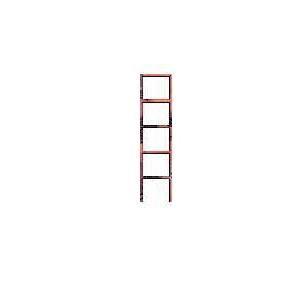

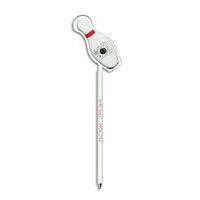

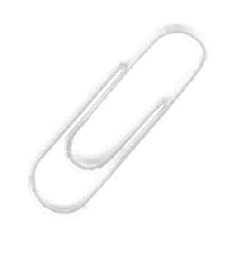

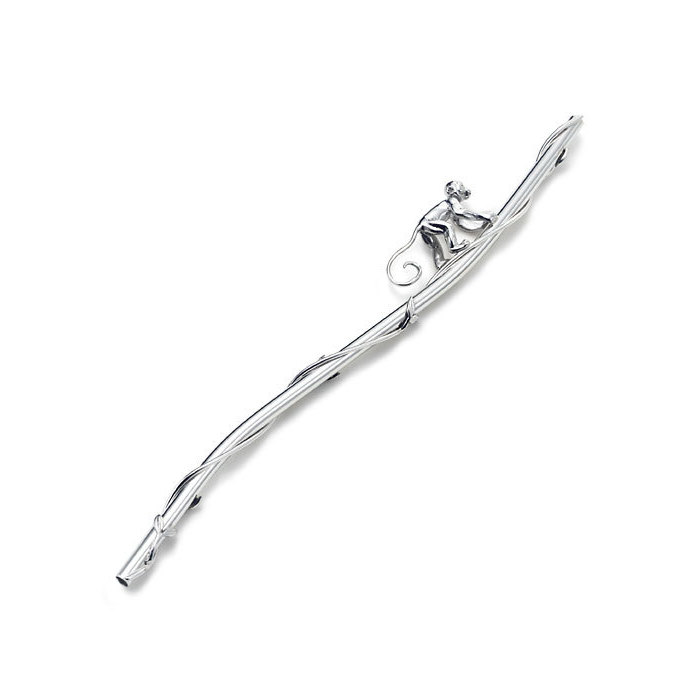

In [12]:
sorted_df = results_df.sort_values(by=[f'LightImages score'])
files =list(sorted_df[sorted_df[f'LightImages bool'] == True]['image_name'])
display_results(files)

## Low Entropy

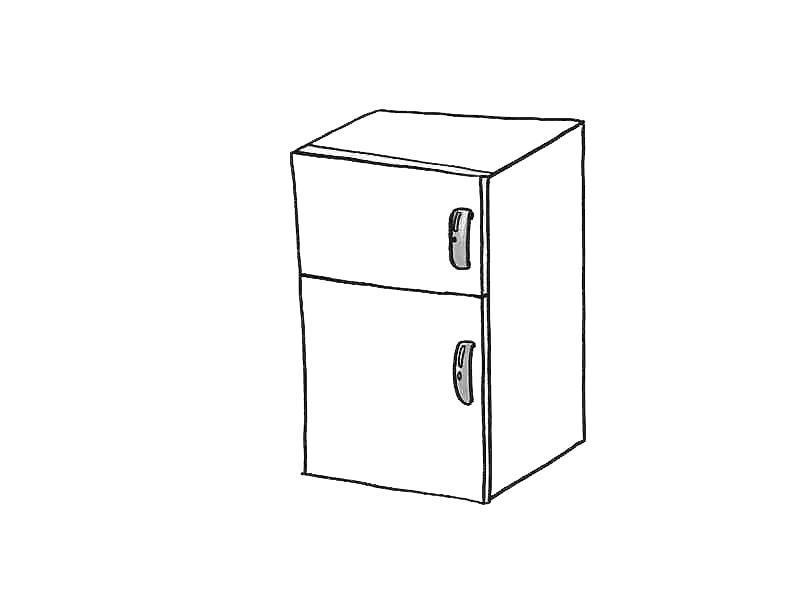

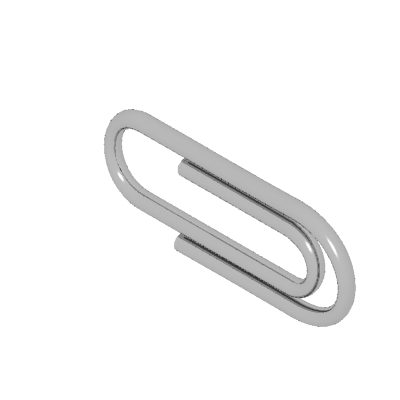

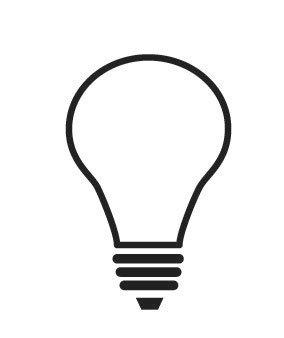

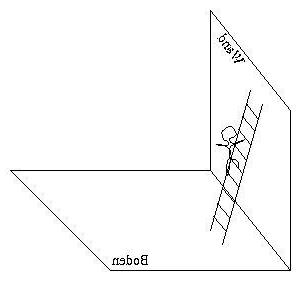

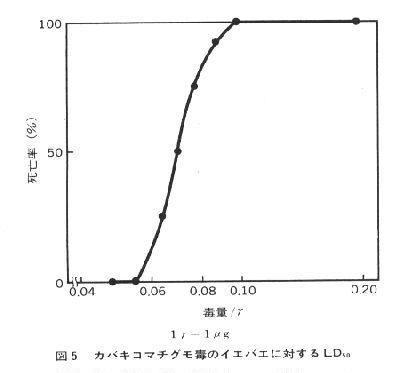

In [13]:
sorted_df = results_df.sort_values(by=[f'Entropy score'])
files =list(sorted_df[sorted_df[f'Entropy bool'] == True]['image_name'])
display_results(files)

## Near Duplicates

0


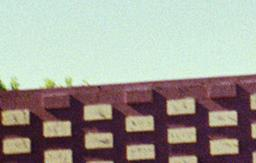

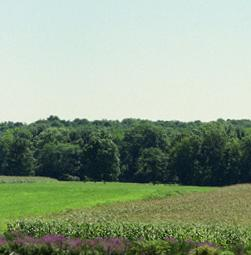

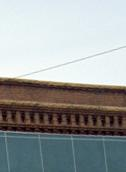

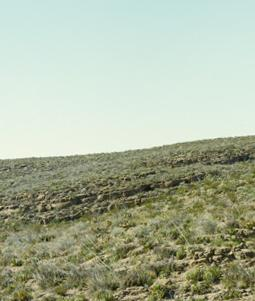

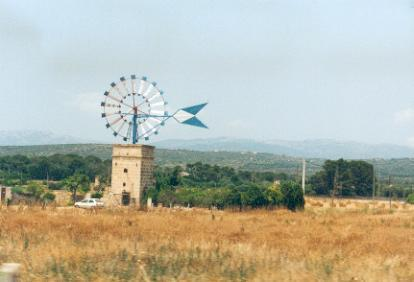

1


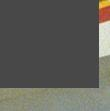

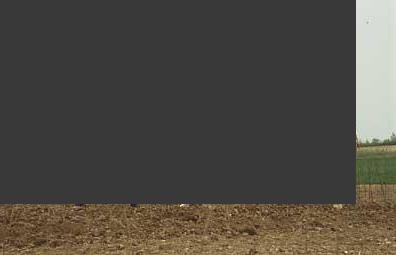

2


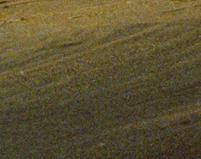

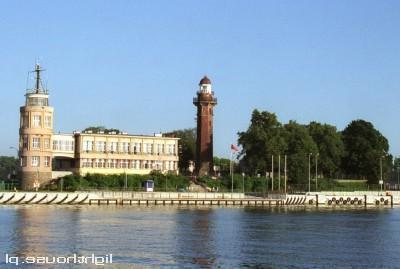

3


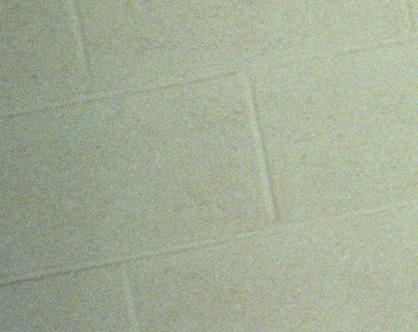

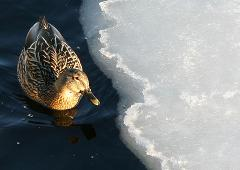

4


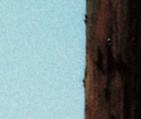

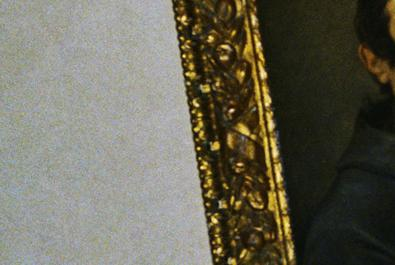

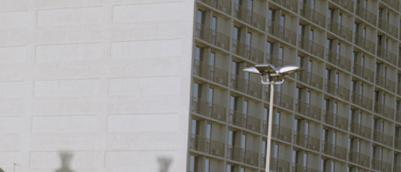

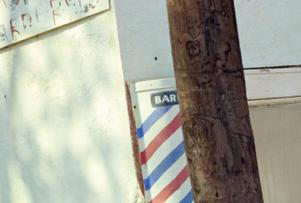

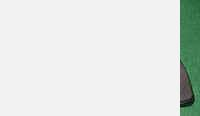

In [18]:
for manager in imagelab.issue_managers:
    if manager.issue_name == 'NearDuplicates':
        duplicate_sets = manager.get_duplicated_sets()
for i, s in enumerate(duplicate_sets[:5]):
    print(i)
    display_results(s)

## Duplicated

0


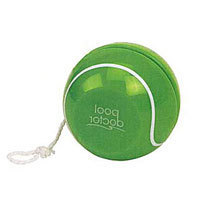

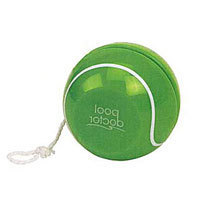

1


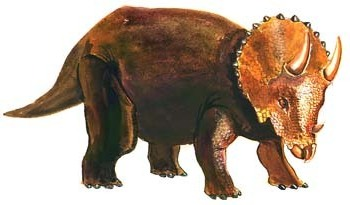

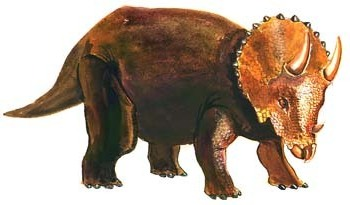

2


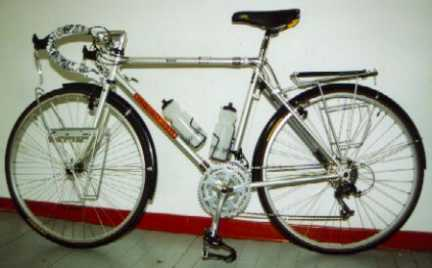

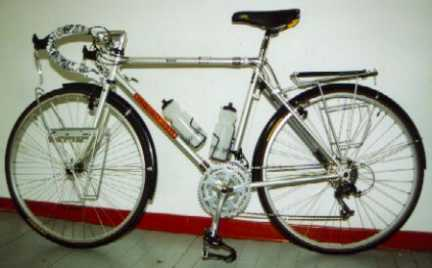

3


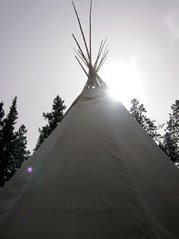

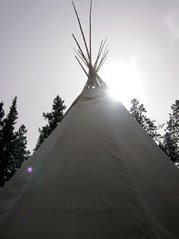

4


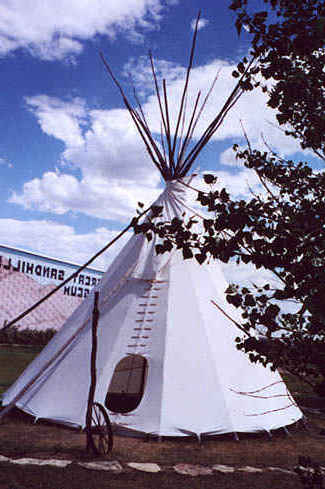

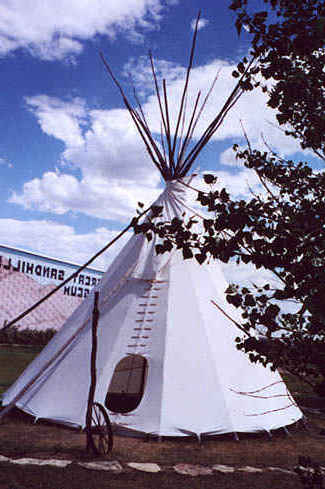

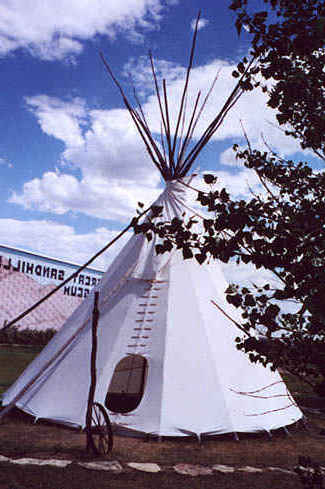

In [19]:
for manager in imagelab.issue_managers:
    if manager.issue_name == 'Duplicated':
        duplicate_sets = manager.get_duplicated_sets()
for i, s in enumerate(duplicate_sets[:5]):
    print(i)
    display_results(s)

## Low Entropy

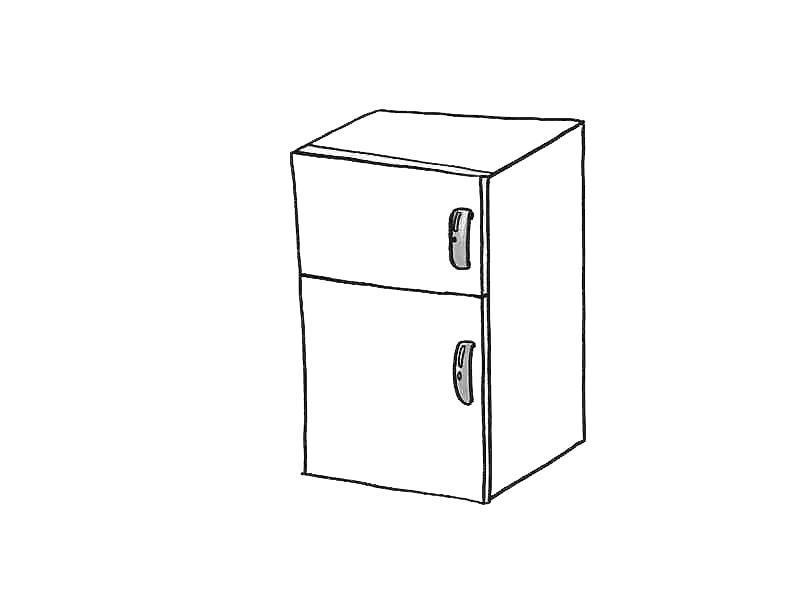

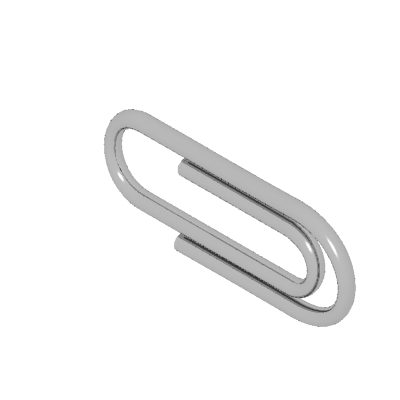

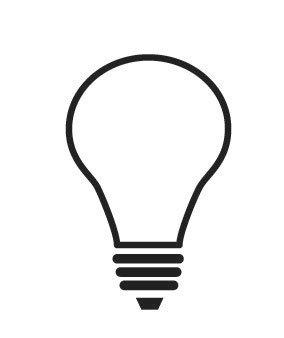

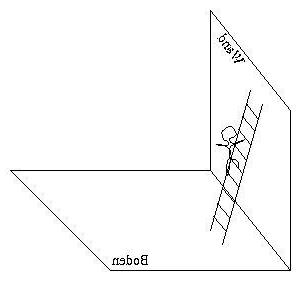

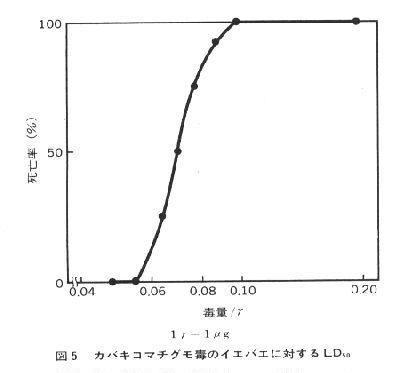

In [17]:
sorted_df = results_df.sort_values(by=[f'Entropy score'])
files =list(sorted_df[sorted_df[f'Entropy bool'] == True]['image_name'])
display_results(files)